In [65]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [40]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
print(plotly.__version__)
print(cf.__version__)

5.3.1
0.17.3


### 타이타닉 데이터셋으로 연습

In [42]:
titanic = sns.load_dataset('titanic')

In [43]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
titanic.iplot(kind='bar', x='age', y='survived')

In [45]:
titanic.iplot(kind='scatter', x='age', y='pclass', mode='markers')

In [46]:
titanic.iplot(kind='box', x='class', y='fare')

## 운동 데이터 분석

In [47]:
exercise = sns.load_dataset('exercise')

In [48]:
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [49]:
exercise.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [50]:
exercise.shape

(90, 6)

In [51]:
exercise.time.unique()

['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']

* time 정보는 1분, 15분, 30분 세 가지로 구성되어 있다.

In [52]:
time_list = []
k=0
for i in exercise['time']:
    i = int(i.replace('min', '').strip())
    time_list.append(i)

In [53]:
exercise.loc[:,['time']] = time_list

* time 정보가 str이니까 int로 바꿔주자

In [54]:
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1,rest
1,1,1,low fat,85,15,rest
2,2,1,low fat,88,30,rest
3,3,2,low fat,90,1,rest
4,4,2,low fat,92,15,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15,running
86,86,29,no fat,130,30,running
87,87,30,no fat,99,1,running
88,88,30,no fat,111,15,running


### 운동 종류에 따라서 맥박 수가 어떻게 다를까?

In [55]:
exercise.iplot(kind='scatter', x='kind', y='pulse', mode='markers')

In [56]:
exercise.iplot(kind='box', x='genre', y='pulse')

#### seaborn과의 비교

<AxesSubplot:xlabel='kind', ylabel='pulse'>

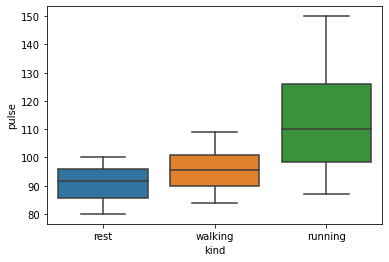

In [57]:
sns.boxplot(x='kind', y='pulse',data=exercise)

* iplot에서 kind='box'는 인자에 상관 없이 그래프를 만드는 듯 하다

### 운동 종류에 따라서 평균 운동 시간이 어떻게 될까

In [58]:
exercise.iplot(kind='scatter', x='kind', y='time', mode='markers')

#### seaborn과의 비교

<AxesSubplot:xlabel='kind', ylabel='time'>

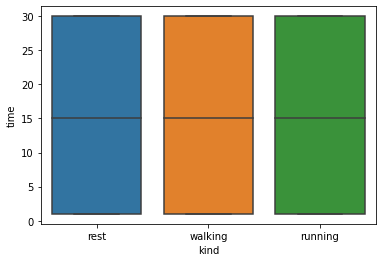

In [59]:
sns.boxplot(x='kind', y='time', data=exercise)

* boxplot은 데이터의 종류가 다양하지 않을 때에는 별로 도움이 되지 않는다는 걸 알았다.
* 만약에 time 값이 다양했더라면, 더 의미있는 시각화가 가능했을 것 같다.

### 운동 시간에 따라서 심박수가 어떻게 달라질까?

In [60]:
exercise.iplot(kind='scatter', x='time', y='pulse', mode='markers')

In [61]:
exercise.iplot(kind='box', x='time', y='pulse', mode='markers')

#### seaborn과의 비교

<AxesSubplot:xlabel='time', ylabel='pulse'>

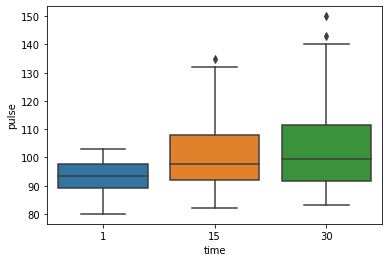

In [62]:
sns.boxplot(x='time', y='pulse', data=exercise)

* 운동 시간이 길어질수록 심박수가 높아지는 경향이 있었다.
* 그러나 운동 시간이 길다고 해서 무조건 높은 심박수를 기록하는 것은 아니었다.

## 연비 데이터셋

In [63]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


* mpg = mile per gallon: 갤론 당 몇 마일 가는지
* displacement = engine displacement : 배기량
* horsepower : 마력
* acceleration : 가속도

In [75]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


### 실린더에 따라 mpg가 변화할까?

In [68]:
fig = px.scatter(mpg, x='cylinders', y='mpg', trendline='ols')
fig.show()

* 실린더가 늘어날수록 연비가 줄어드는 경향이 있다.

In [70]:
fig = px.scatter(mpg, x='cylinders', y='mpg', trendline='lowess')
fig.show()

* linear Ordinary Least Squares (OLS)
* Locally WEighted Scatterplot Smoothing (LOWESS)
* 자료 형태에 따라서 lowess가 그려지지 않을 수도 있다.

### 배기량에 따라 mpg가 변화할까?

In [73]:
fig = px.scatter(mpg, x='displacement', y='mpg', trendline='ols')
fig.show()

In [74]:
fig = px.scatter(mpg, x='displacement', y='mpg', trendline='lowess')
fig.show()